In [1]:
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import pandas as pd
import itertools
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [2]:
#roots 
root_data =  'C:\\Users\\David\\Google Drive\\Alicante'
root_analysis = 'C:\\Users\\David\\Dropbox\\ALICANTE\\plots_fnir'

os.chdir( root_data)
f=open("data_fnir.pickle","rb")
data=np.array(pickle.load(f, encoding='latin1'))

In [3]:
strings=['DIR_CARTAS_C','DIR_CARTAS_NC', 'DIR_CUBILETES_C', 'DIR_CUBILETES_NC', 'DIR_MONEDAS_C', 'DIR_MONEDAS_NC', 'ORD_CARTAS_C', 'ORD_CARTAS_NC', 'ORD_CUBILETES_C', 'ORD_CUBILETES_NC', 'ORD_MONEDAS_C', 'ORD_MONEDAS_NC']
conditions=['d_c_c','d_c_n', 'd_b_c', 'd_b_n', 'd_m_c', 'd_m_n', 'o_c_c', 'o_c_n', 'o_b_c', 'o_b_n', 'o_m_c', 'o_m_n']
c_o_d=['directo', 'directo', 'directo', 'directo', 'directo', 'directo', 'video', 'video', 'video', 'video', 'video', 'video']
c_material=['cartas', 'cartas', 'cubiletes', 'cubiletes', 'monedas', 'monedas', 'cartas', 'cartas', 'cubiletes', 'cubiletes', 'monedas', 'monedas']
c_ncondi=['cond', 'no-cond', 'cond', 'no-cond', 'cond', 'no-cond', 'cond', 'no-cond', 'cond', 'no-cond', 'cond', 'no-cond']

subj_labels = strings_in=[[1,2,5,7,10,11,18,21,26,30,31,32,33,34,39,44,45,51], [3,4,6,8,9,12,13,16,17,22,25,40,41,42,43,46,47,52], [1,2,5,7,11,18,21,26,30,31,32,33,34,39,44,45,51], [3,4,6,8,9,12,13,16,17,22,25,40,41,42,43,46,47,52], [3,4,6,8,9,12,13,16,17,22,25,40,41,42,43,46,47,52], [1,2,5,7,10,11,18,21,26,30,31,32,33,34,39,44,45,51], [14,19,23,28,29,35,38,49,53], [15,20,24,27,36,37,48,50], [15,20,24,27,36,37,48,50], [14,19,23,28,29,35,38,49,53], [15,20,24,27,36,37,48,50], [14,19,23,28,29,35,38,49,53]]
#
label_channel =[ [str(i) + '_s_t', str(i) + '_s_740', str(i) + '_s_860', str(i) + '_l_t', str(i) + '_l_740', str(i) + '_l_860'] for i in range(0,16)]
label_channel = list(itertools.chain.from_iterable(label_channel)) 
colum_matrix = ['time', 'marks', 'baseline'] + label_channel

In [4]:
frames=[]
for c_idx, cond in enumerate(conditions):
    subj_list = subj_labels[c_idx]
    for idx, subject in enumerate(subj_list):
        ### fataframe of this subject in this condition
        df_s = pd.DataFrame( data[c_idx][idx] )
        df_s.columns = colum_matrix
        ######
        ######
        ######
        ######        
        #### substract_baseline in each subject and condition
        #### (if you do not want this you have to comment)
        # baseline of each channel (when ==1)
        bl_column_mean = df_s.loc[df_s['baseline'] == 1].iloc[-150:].mean(axis=0)
        bl_column_std = df_s.loc[df_s['baseline'] == 1].iloc[-150:].std(axis=0)
        ## df of just recording ==2
        df_2 = df_s.loc[df_s['baseline'] == 2]
        #relative increase over baseline
        #_df_s = (df_2[label_channel] - bl_column_mean[label_channel])/ bl_column_std 
        df_s = df_2[label_channel] - bl_column_mean[label_channel]
        # this columns are the same
        df_s['time'] = df_2['time']
        df_s['marks'] = df_2['marks']   
        df_s['baseline'] = df_2['baseline']
        ######
        ######
        ######
        ######
        # add the subject and the condition (you need this inependently of the baseline substraction)
        df_s['cond'] = cond
        df_s['vision'] = c_o_d[c_idx]
        df_s['material'] = c_material[c_idx]
        df_s['naturalidad'] = c_ncondi[c_idx]
        df_s['subj'] = subject
        frames.append(df_s)
    

df_bl = pd.concat(frames, ignore_index=True)


In [5]:
##### df of 5 seconds after they click of surprise!
surprise_idx = df_bl.loc[df_bl['marks']==17].index
time_adquisition=10 # 10 frames for second


###plt.plot(df_bl[label_channel_t[8]].iloc[idx-150: idx+25])
t_b = 30
t_a = 30

df_5s=[]
for idx in surprise_idx:
    #df_before_mean =  df_bl.iloc[idx- t_base : idx ][label_channel].mean(axis=0)
    #df_before_std =  df_bl.iloc[idx- t_base : idx ][label_channel].std(axis=0)
    #df_after =  df_bl.iloc[idx-t_res : idx][label_channel] - df_before_mean
    df_after =  df_bl.iloc[idx-t_b : idx + t_a][label_channel] 
    df_after['cond'] = df_bl.iloc[idx-t_b : idx + t_a]['cond']
    df_after['vision'] = df_bl.iloc[idx-t_b : idx + t_a]['vision']
    df_after['material'] = df_bl.iloc[idx-t_b : idx+ t_a]['material']
    df_after['baseline'] = df_bl.iloc[idx-t_b : idx+ t_a]['baseline']
    df_after['naturalidad'] = df_bl.iloc[idx-t_b : idx+ t_a]['naturalidad']
    df_after['subj'] = df_bl.iloc[idx-t_b : idx+ t_a]['subj']
    df_5s.append( df_after ) ## df_bl.iloc[idx-50 : idx + 50]

        
##### 5 seconds after they click, normalized by baseline!
df_5s = pd.concat(df_5s, ignore_index=True)

In [ ]:
### Short channels (860 - 740)

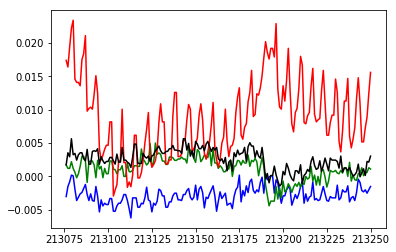

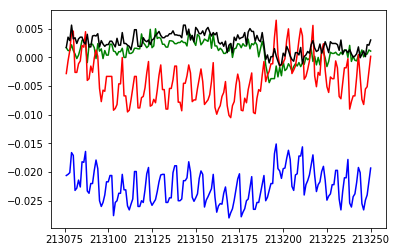

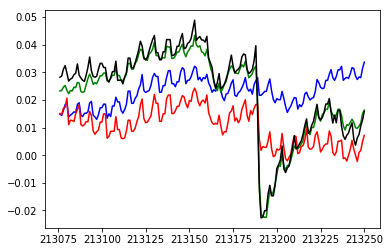

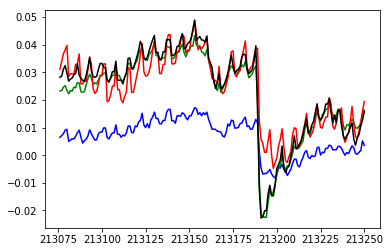

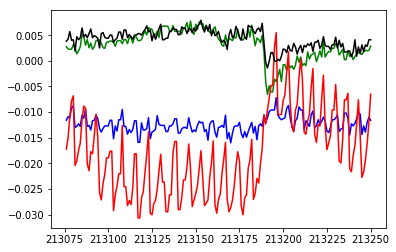

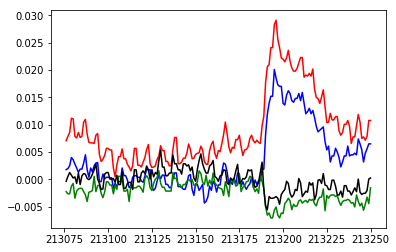

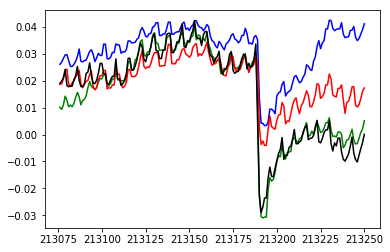

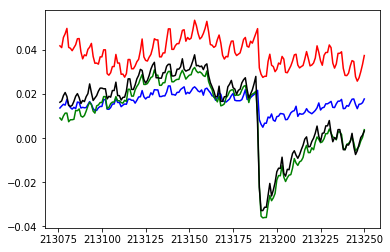

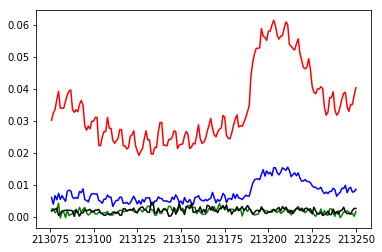

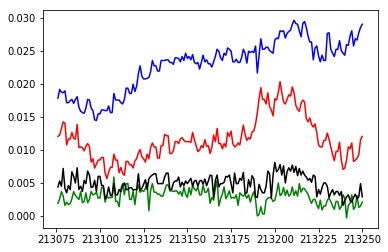

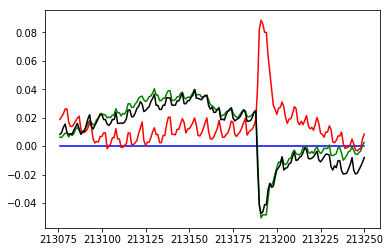

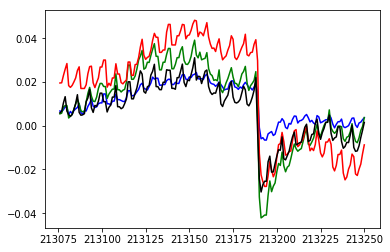

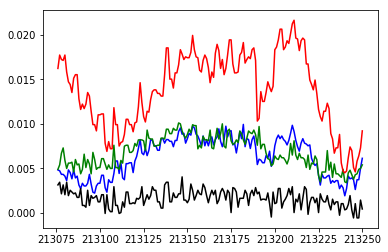

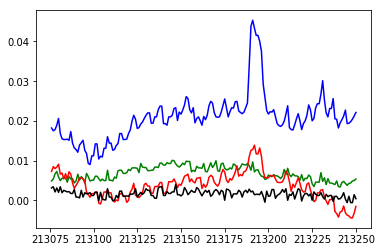

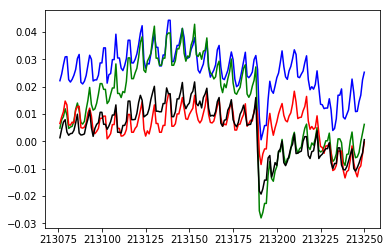

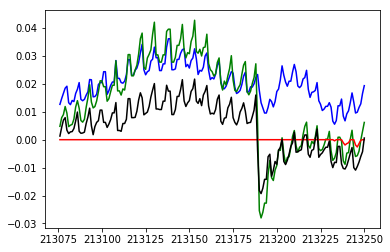

In [27]:
label_channel_s_740 =[ str(i) + '_s_740' for i in range(0,16)] 
label_channel_l_740 =[ str(i) + '_l_740' for i in range(0,16)] 
label_channel_s_860 =[ str(i) + '_s_860' for i in range(0,16)] 
label_channel_l_860 =[ str(i) + '_l_860' for i in range(0,16)] 
label_channel_s_t =[ str(i) + '_s_t' for i in range(0,16)] 
label_channel_l_t =[ str(i) + '_l_t' for i in range(0,16)] 


# for i in range(0,16):
#     plt.plot(df_bl[label_channel_s_740[i]].iloc[idx-150: idx+25], 'b')
#     plt.plot(df_bl[label_channel_l_740[i]].iloc[idx-150: idx+25], 'g')
#     plt.plot(df_bl[label_channel_s_860[i]].iloc[idx-150: idx+25], 'r')
#     plt.plot(df_bl[label_channel_l_860[i]].iloc[idx-150: idx+25], 'k')
#     plt.show()


    

In [16]:
### Short channels 
#### (860 - 740) --> Refelcting increase of oxigenation in the vascularization

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


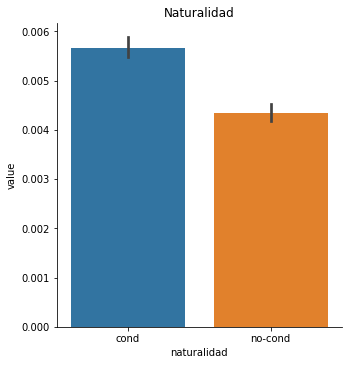

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


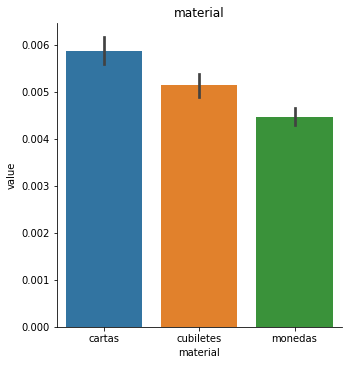

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


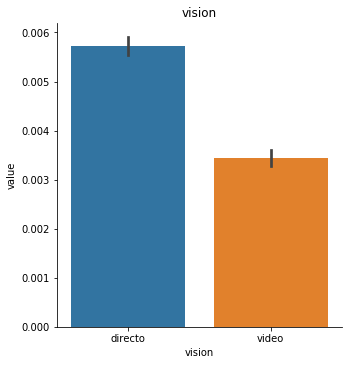

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


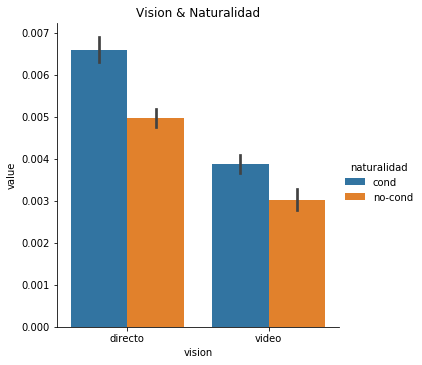

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


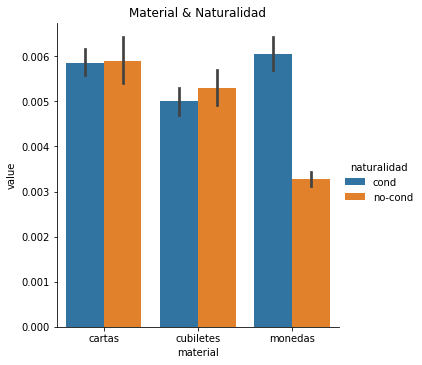

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


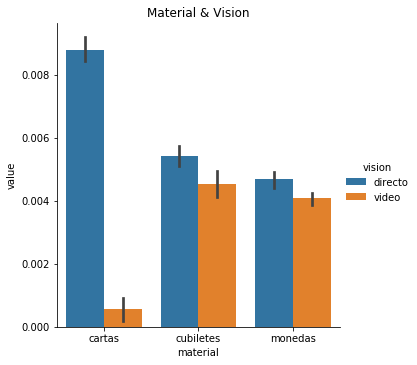

In [28]:
#### Naturalidad
df_5s_nat = pd.melt(df_5s, id_vars='naturalidad', value_vars =label_channel_s_740 )
   
#### Material
df_5s_mat = pd.melt(df_5s, id_vars='material', value_vars =label_channel_s_740 )

#### visionado
df_5s_vis = pd.melt(df_5s, id_vars='vision', value_vars =label_channel_s_740 )

### all together in df_5
df_5s_subj = pd.melt(df_5s, id_vars='subj', value_vars =label_channel_s_740 )
df_5s_860 = pd.melt(df_5s, id_vars='naturalidad', value_vars =label_channel_s_860 ) 
## 860 - 740 to analyze!
value = df_5s_860['value'] - df_5s_vis['value']
df_5 = df_5s_vis.copy()
df_5['value'] = value
df_5['material'] = df_5s_mat['material']
df_5['naturalidad'] = df_5s_nat['naturalidad']
df_5['subj'] = df_5s_subj['subj']

######################### Plots ##############################

sns.factorplot(x='naturalidad', y='value', data=df_5, kind='bar' )
plt.title('Naturalidad')
plt.show(block=False)

sns.factorplot(x='material', y='value', data=df_5, kind='bar' )
plt.title('material')
plt.show(block=False)

sns.factorplot(x='vision', y='value', data=df_5, kind='bar' )
plt.title('vision')
plt.show(block=False)

######

sns.factorplot(x='vision', y='value', hue='naturalidad', data=df_5, kind='bar' )
plt.title('Vision & Naturalidad')
plt.show(block=False)

sns.factorplot(x='material', y='value', hue='naturalidad', data=df_5, kind='bar' )
plt.title('Material & Naturalidad')
plt.show(block=False)

sns.factorplot(x='material', y='value', hue='vision', data=df_5, kind='bar' )
plt.title('Material & Vision')
plt.show(block=False)


In [8]:
### Long channels
#### (860 - 740) --> Refelcting increase of oxigenation in the PFC

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


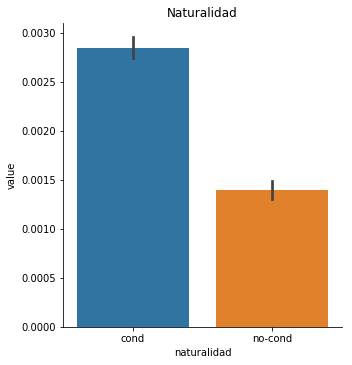

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


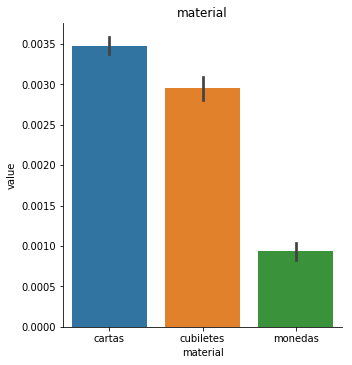

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


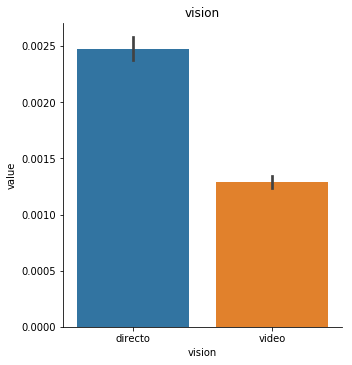

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


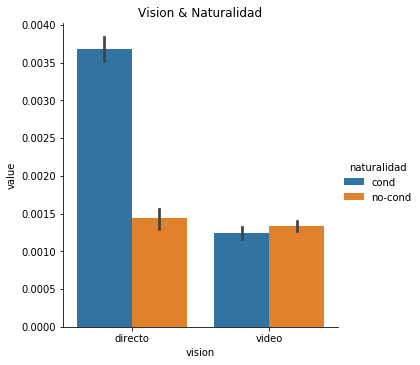

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


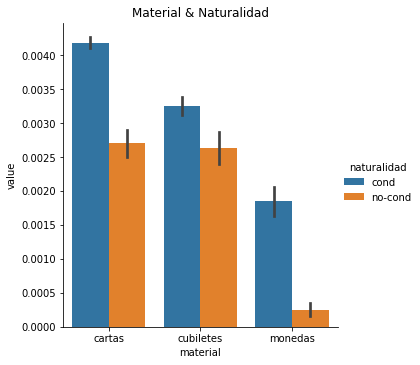

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


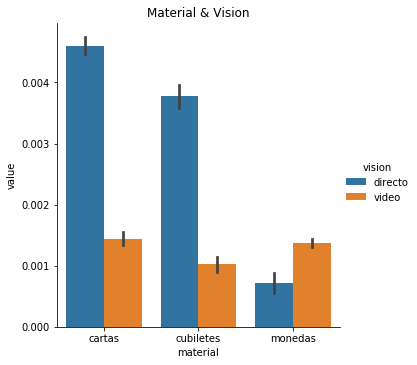

In [30]:
#### Naturalidad
df_5s_nat = pd.melt(df_5s, id_vars='naturalidad', value_vars =label_channel_l_740 )
   
#### Material
df_5s_mat = pd.melt(df_5s, id_vars='material', value_vars =label_channel_l_740 )

#### visionado
df_5s_vis = pd.melt(df_5s, id_vars='vision', value_vars =label_channel_l_740 )

### all together in df_5
df_5s_subj = pd.melt(df_5s, id_vars='subj', value_vars =label_channel_l_740 )
df_5s_860 = pd.melt(df_5s, id_vars='naturalidad', value_vars =label_channel_l_860 ) 
## 860 - 740 to analyze!
value = df_5s_860['value'] - df_5s_vis['value']
df_5_l = df_5s_vis.copy()
df_5_l['value'] = value
df_5_l['material'] = df_5s_mat['material']
df_5_l['naturalidad'] = df_5s_nat['naturalidad']
df_5_l['subj'] = df_5s_subj['subj']

######################### Plots ##############################

sns.factorplot(x='naturalidad', y='value', data=df_5_l, kind='bar' )
plt.title('Naturalidad')
plt.show(block=False)

sns.factorplot(x='material', y='value', data=df_5_l, kind='bar' )
plt.title('material')
plt.show(block=False)

sns.factorplot(x='vision', y='value', data=df_5_l, kind='bar' )
plt.title('vision')
plt.show(block=False)

######

sns.factorplot(x='vision', y='value', hue='naturalidad', data=df_5_l, kind='bar' )
plt.title('Vision & Naturalidad')
plt.show(block=False)

sns.factorplot(x='material', y='value', hue='naturalidad', data=df_5_l, kind='bar' )
plt.title('Material & Naturalidad')
plt.show(block=False)

sns.factorplot(x='material', y='value', hue='vision', data=df_5_l, kind='bar' )
plt.title('Material & Vision')
plt.show(block=False)


In [31]:
df_5.head()
df_5_l.head()


,vision,variable,value,material,naturalidad,subj
0,directo,0_l_740,0.001012,cartas,cond,2
1,directo,0_l_740,0.001712,cartas,cond,2
2,directo,0_l_740,0.001412,cartas,cond,2
3,directo,0_l_740,0.003812,cartas,cond,2
4,directo,0_l_740,0.002312,cartas,cond,2
